In [1]:
from aiml import MLModels
from sklearn.preprocessing import MinMaxScaler

/home/edavid/repo/playground/ml/aiml/models.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Classification

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

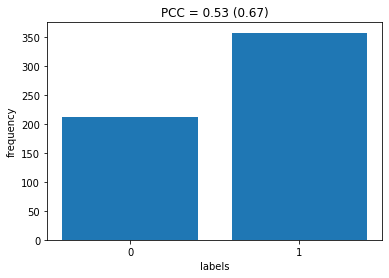

KNN



Logistic Regression (L1)



Logistic Regression (L2)



Linear SVM (L1)



Linear SVM (L2)


,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.933566,n_neighbors = 8,N/A
1,Logistic Regression (L1),0.898601,C = 0.001,mean radius
2,Logistic Regression (L2),0.898601,C = 0.0001,mean perimeter
3,Linear SVM (L1),0.986014,C = 5,mean concave points
4,Linear SVM (L2),0.982517,C = 1000,mean radius


In [3]:
MLModels.random_state = 10510084 # should generate the same state so we can write tests
MLModels.n_trials = 2 # Change n_trials for all models, lazy to wait so setting this to a low value
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, n_neighbors=list(range(1,10)), methods='all')

In [4]:
MLModels.summarize(m, cancer.feature_names)

,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.933566,n_neighbors = 8,N/A
1,Logistic Regression (L1),0.898601,C = 0.001,mean radius
2,Logistic Regression (L2),0.898601,C = 0.0001,mean perimeter
3,Linear SVM (L1),0.986014,C = 5,mean concave points
4,Linear SVM (L2),0.982517,C = 1000,mean radius


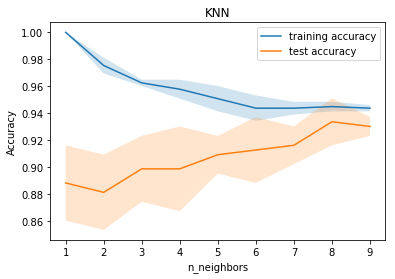

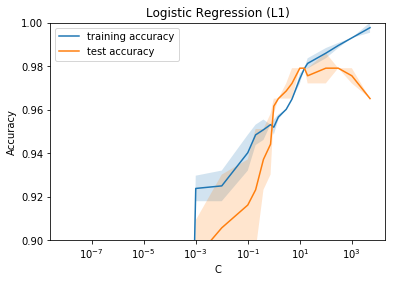

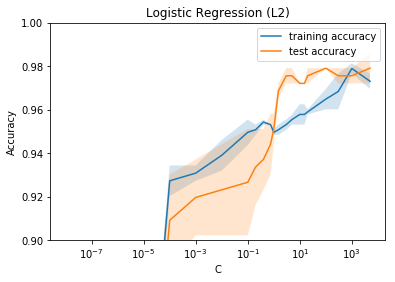

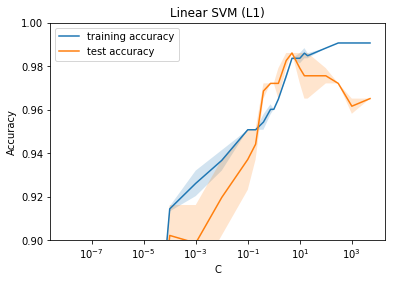

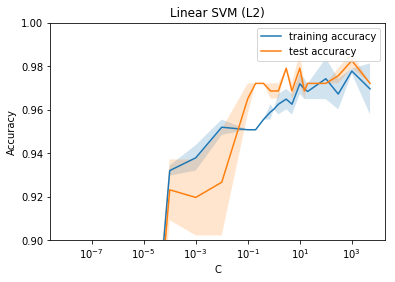

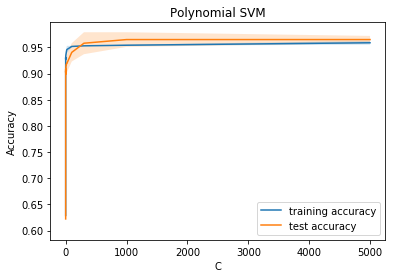

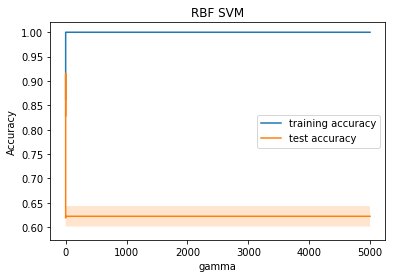

In [5]:
for k in m:
    ax = m[k].plot_accuracy()
    ax.set_title(k)
    if 'Logistic' in k or 'Linear' in k:
        ax.set_ylim(0.9, 1)
        ax.set_xscale('log')

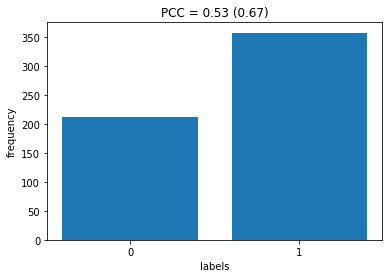

KNN


,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.933566,n_neighbors = 8,N/A


In [6]:
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, n_neighbors=list(range(1,10)), methods='knn')

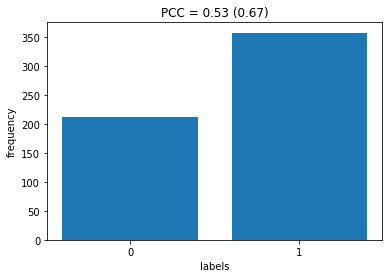

Logistic Regression (L1)



Logistic Regression (L2)


,Model,Accuracy,Best Parameter,Top Predictor
0,Logistic Regression (L1),0.979021,C = 10,mean perimeter
1,Logistic Regression (L2),0.979021,C = 100,mean perimeter


In [7]:
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, n_neighbors=list(range(1,10)), methods='lr')

### Scaling the data

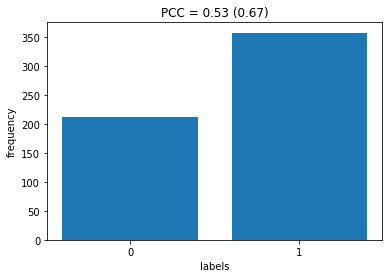

KNN



Logistic Regression (L1)



Logistic Regression (L2)



Linear SVM (L1)



Linear SVM (L2)


,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.986014,n_neighbors = 3,N/A
1,Logistic Regression (L1),0.996503,C = 3,mean radius
2,Logistic Regression (L2),0.996503,C = 10,worst concave points
3,Linear SVM (L1),0.993007,C = 1,worst concave points
4,Linear SVM (L2),0.993007,C = 0.4,mean concave points


In [6]:
MLModels.n_trials = 2
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, scaler=MinMaxScaler())

In [9]:
m['Logistic Regression (L1)'].coef

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Regression

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()

In [16]:
MLModels.n_trials = 2

KNN



Linear Regression (L1)



Linear Regression (L2)



{'KNN': <aiml.models.KNNRegressor object at 0x7ff040a49438>, 'Linear Regression (L1)': <aiml.models.LassoRegressor object at 0x7ff040a49978>, 'Linear Regression (L2)': <aiml.models.RidgeRegressor object at 0x7ff040a495f8>}


,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.334857,n_neighbors = 5,None
1,Linear Regression (L1),0.699884,alpha = 1e-12,NOX
2,Linear Regression (L2),0.699884,alpha = 1e-12,NOX


In [17]:
m = MLModels.run_regression(boston.data, boston.target, boston.feature_names, algorithm=['linear1'])

method linear1 not in options
Linear Regression (L1)



{'Linear Regression (L1)': <aiml.models.LassoRegressor object at 0x7ff040b16d68>}


,Model,Accuracy,Best Parameter,Top Predictor
0,Linear Regression (L1),0.699884,alpha = 1e-12,NOX


In [18]:
m = MLModels.run_regression(boston.data, boston.target, boston.feature_names, algorithm=['linear2'])

method linear2 not in options
Linear Regression (L2)



{'Linear Regression (L2)': <aiml.models.RidgeRegressor object at 0x7ff0412b1fd0>}


,Model,Accuracy,Best Parameter,Top Predictor
0,Linear Regression (L2),0.699884,alpha = 1e-12,NOX


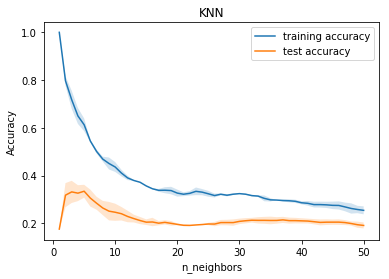

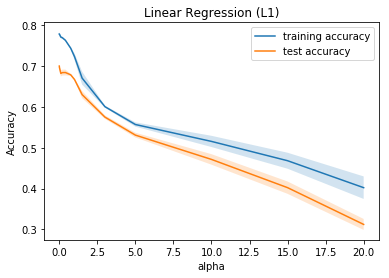

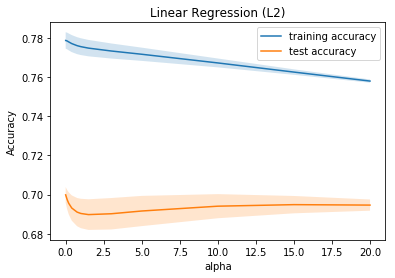

In [10]:
for k in m:
    ax = m[k].plot_accuracy()
    ax.set_title(k)

In [11]:
MLModels.summarize(m, boston.feature_names)

,Model,Accuracy,Best Parameter,Top Predictor
0,KNN,0.334857,n_neighbors = 5,None
1,Linear Regression (L1),0.699884,alpha = 1e-12,NOX
2,Linear Regression (L2),0.699884,alpha = 1e-12,NOX


In [ ]:
hasattr(MLModels, '')